In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visits = pd.read_sql('SELECT * FROM Visits', con=db_connection)
visits['created'] = pd.to_datetime(visits['created'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['lastmodified'] = pd.to_datetime(visits['lastmodified'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['registered'] = visits['registered'].replace(0, np.nan)
visits['registered'] = pd.to_datetime(visits['registered'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['deleted'] = visits['deleted'].replace(0, np.nan)
visits['deleted'] = pd.to_datetime(visits['deleted'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['paired'] = visits['paired'].replace(0, np.nan)
visits['paired'] = pd.to_datetime(visits['paired'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['created_ip'].replace(0, np.nan, inplace=True)
visits['registered_ip'].replace(0, np.nan, inplace=True)
visits['paired_ip'].replace(0, np.nan, inplace=True)
# visits['processed'].replace(0, np.nan, inplace=True)
visits['exported'].replace(0, np.nan, inplace=True)
visits['title'].fillna(value=np.nan, inplace=True)
visits['note'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 1000)

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716282 entries, 0 to 716281
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype                     
---  ------                 --------------   -----                     
 0   id                     716282 non-null  int64                     
 1   shortcode              716282 non-null  object                    
 2   user_id                716282 non-null  int64                     
 3   created                716282 non-null  datetime64[ns, US/Eastern]
 4   lastmodified           716282 non-null  datetime64[ns, US/Eastern]
 5   registered             545751 non-null  datetime64[ns, US/Eastern]
 6   expires                716282 non-null  int64                     
 7   paired                 23132 non-null   datetime64[ns, US/Eastern]
 8   ticket                 716282 non-null  object                    
 9   deleted                67 non-null      datetime64[ns, US/Eastern]
 10  created_ip          

In [6]:
visits

,id,shortcode,user_id,created,lastmodified,registered,expires,paired,ticket,deleted,created_ip,registered_ip,paired_ip,processed,purchased_by_user_id,note,exported,first_accessed,ignore_first_accessed,title
0,794965,20141029u305,0,2014-10-29 17:10:47-04:00,2016-02-23 17:57:37-05:00,2014-10-29 17:10:47-04:00,0,2014-10-29 17:13:56-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""794965"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T17:10:47-04:00""}",2014-10-29 19:19:52-04:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
1,795317,foo001,0,2014-10-29 19:32:29-04:00,2016-02-23 17:57:37-05:00,2014-10-29 19:32:29-04:00,0,2014-10-29 19:33:06-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795317"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:32:29-04:00""}",2014-10-29 19:35:18-04:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
2,795341,foo002,0,2014-10-29 19:40:51-04:00,2016-02-23 17:57:37-05:00,2014-10-29 19:40:51-04:00,0,2014-10-29 19:41:08-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795341"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:40:51-04:00""}",2014-10-29 19:41:21-04:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
3,795351,foo003,0,2014-10-29 19:43:31-04:00,2016-02-23 17:57:37-05:00,2014-10-29 19:43:31-04:00,0,2014-10-29 19:44:28-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795351"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:43:31-04:00""}",2014-10-29 19:44:34-04:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
4,795405,foo004,0,2014-10-29 20:13:47-04:00,2016-02-23 17:57:37-05:00,2014-10-29 20:13:47-04:00,0,2014-10-29 20:14:13-04:00,"{""tessitura_spoofing"":1,""ticket_id"":""795405"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T20:13:47-04:00""}",2014-10-29 20:14:41-04:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716277,132806719,56bs6,0,2020-07-09 09:11:50-04:00,2020-07-09 09:22:11-04:00,2020-07-09 09:12:12-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940560"",""ticket_id"":""940560"",""shortcode"":""56bs6"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:12AM"",""attended"":""1"",""type"":null}",NaT,1.198075e+09,1.198075e+09,NaN,0,0,NaN,NaN,1.594301e+09,NaN,NaN
716278,132806727,cvszd,0,2020-07-09 09:16:19-04:00,2020-07-09 09:22:42-04:00,2020-07-09 09:16:32-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940561"",""ticket_id"":""940561"",""shortcode"":""cvszd"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:16AM"",""attended"":""1"",""type"":null}",NaT,1.198075e+09,1.198075e+09,NaN,0,0,NaN,NaN,1.594301e+09,NaN,NaN
716279,132806735,zrbqg,0,2020-07-09 09:19:41-04:00,2020-07-09 09:22:54-04:00,2020-07-09 09:19:58-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940562"",""ticket_id"":""940562"",""shortcode"":""zrbqg"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:19AM"",""attended"":""1"",""type"":null}",NaT,1.198075e+09,1.198075e+09,NaN,0,0,NaN,NaN,1.594301e+09,NaN,NaN
716280,132806749,Jr656,0,2020-07-09 09:40:43-04:00,2020-07-09 09:40:43-04:00,2020-07-09 09:40:42-04:00,0,NaT,"{""status"":""Attendance recorded for ticket: 940563"",""ticket_id"":""940563"",""shortcode"":""Jr656"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:40AM"",""attended"":""1"",""type"":null}",NaT,1.198075e+09,1.198075e+09,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
visits= visits.drop(['expires','created_ip', 'registered_ip', 'paired_ip', 'processed', 'purchased_by_user_id', 'note', 'exported', 'ignore_first_accessed', 'title'], axis=1)

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716282 entries, 0 to 716281
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              716282 non-null  int64         
 1   shortcode       716282 non-null  object        
 2   user_id         716282 non-null  int64         
 3   created         716282 non-null  datetime64[ns]
 4   lastmodified    716282 non-null  datetime64[ns]
 5   registered      545751 non-null  datetime64[ns]
 6   paired          23132 non-null   datetime64[ns]
 7   ticket          716282 non-null  object        
 8   deleted         67 non-null      datetime64[ns]
 9   first_accessed  142762 non-null  float64       
dtypes: datetime64[ns](5), float64(1), int64(2), object(2)
memory usage: 54.6+ MB


In [6]:
visits

,id,shortcode,user_id,created,lastmodified,registered,paired,ticket,deleted,first_accessed
0,794965,20141029u305,0,2014-10-29 21:10:47,2016-02-23 22:57:37,2014-10-29 21:10:47,2014-10-29 21:13:56,"{""tessitura_spoofing"":1,""ticket_id"":""794965"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T17:10:47-04:00""}",2014-10-29 23:19:52,NaN
1,795317,foo001,0,2014-10-29 23:32:29,2016-02-23 22:57:37,2014-10-29 23:32:29,2014-10-29 23:33:06,"{""tessitura_spoofing"":1,""ticket_id"":""795317"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:32:29-04:00""}",2014-10-29 23:35:18,NaN
2,795341,foo002,0,2014-10-29 23:40:51,2016-02-23 22:57:37,2014-10-29 23:40:51,2014-10-29 23:41:08,"{""tessitura_spoofing"":1,""ticket_id"":""795341"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:40:51-04:00""}",2014-10-29 23:41:21,NaN
3,795351,foo003,0,2014-10-29 23:43:31,2016-02-23 22:57:37,2014-10-29 23:43:31,2014-10-29 23:44:28,"{""tessitura_spoofing"":1,""ticket_id"":""795351"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T19:43:31-04:00""}",2014-10-29 23:44:34,NaN
4,795405,foo004,0,2014-10-30 00:13:47,2016-02-23 22:57:37,2014-10-30 00:13:47,2014-10-30 00:14:13,"{""tessitura_spoofing"":1,""ticket_id"":""795405"",""performance_id"":""71"",""attended"":""1"",""date_attended"":""2014-10-29T20:13:47-04:00""}",2014-10-30 00:14:41,NaN
...,...,...,...,...,...,...,...,...,...,...
716277,132806719,56bs6,0,2020-07-09 13:11:50,2020-07-09 13:22:11,2020-07-09 13:12:12,NaT,"{""status"":""Attendance recorded for ticket: 940560"",""ticket_id"":""940560"",""shortcode"":""56bs6"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:12AM"",""attended"":""1"",""type"":null}",NaT,1.594301e+09
716278,132806727,cvszd,0,2020-07-09 13:16:19,2020-07-09 13:22:42,2020-07-09 13:16:32,NaT,"{""status"":""Attendance recorded for ticket: 940561"",""ticket_id"":""940561"",""shortcode"":""cvszd"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:16AM"",""attended"":""1"",""type"":null}",NaT,1.594301e+09
716279,132806735,zrbqg,0,2020-07-09 13:19:41,2020-07-09 13:22:54,2020-07-09 13:19:58,NaT,"{""status"":""Attendance recorded for ticket: 940562"",""ticket_id"":""940562"",""shortcode"":""zrbqg"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:19AM"",""attended"":""1"",""type"":null}",NaT,1.594301e+09
716280,132806749,Jr656,0,2020-07-09 13:40:43,2020-07-09 13:40:43,2020-07-09 13:40:42,NaT,"{""status"":""Attendance recorded for ticket: 940563"",""ticket_id"":""940563"",""shortcode"":""Jr656"",""performance_id"":""4254"",""performance_date"":""2020-07-09T10:00:00-04:00"",""date_attended"":""Jul 9 2020 9:40AM"",""attended"":""1"",""type"":null}",NaT,NaN


In [7]:
visits[visits['id'].duplicated()]

,id,shortcode,user_id,created,lastmodified,registered,paired,ticket,deleted,first_accessed


In [18]:
visits['id'].count()
#Total visits: 716,282

716282

In [7]:
visit_opening_hours = visits[['created', 'user_id']]
visit_opening_hours.set_index(['created'], inplace=True)
visit_opening_hours = visit_opening_hours.between_time('10:00', '18:00')

In [9]:
visit_opening_hours.reset_index(inplace=True)

In [12]:
visit_opening_hours[visit_opening_hours['created'] >= '01-01-2020'].count()

created    16609
user_id    16609
dtype: int64

## Visits by time

In [6]:
visits_by_month = visit_opening_hours['created'].groupby(visits.created.dt.to_period("M")).agg('count')
visits_by_month.nlargest()

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


created
2016-07    23608
2016-04    21782
2016-08    20596
2016-05    20524
2016-03    19523
Freq: M, Name: created, dtype: int64

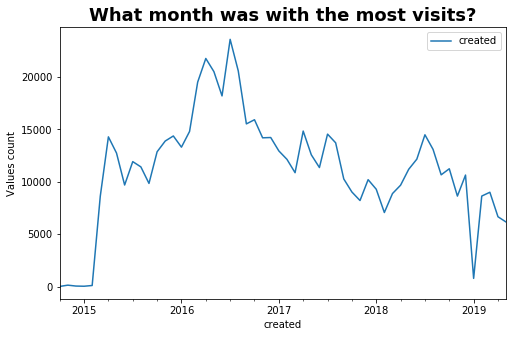

In [7]:
plt.figure(figsize=(8,5))
plt.title('What month was with the most visits?', fontdict={'fontweight': 'bold', 'fontsize':18})

visits_by_month.plot()
plt.ylabel('Values count')
plt.legend()
# plt.savefig('monthly_visits.png', dpi=300)

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


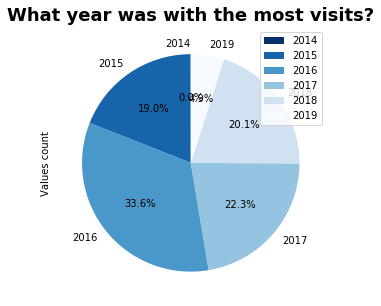

In [8]:
visits_by_year = visit_opening_hours['created'].groupby(visits.created.dt.to_period("Y")).agg('count')

plt.figure(figsize=(8,5))
visits_by_year.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('What year was with the most visits?', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
plt.savefig('yearly_activity.png', dpi=300)

#this aligned with the activity most year, and raiise a question about checkout years

In [10]:
visits_by_year

created
2014       187
2015    119850
2016    212266
2017    140780
2018    127085
2019     31250
Freq: A-DEC, Name: created, dtype: int64

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


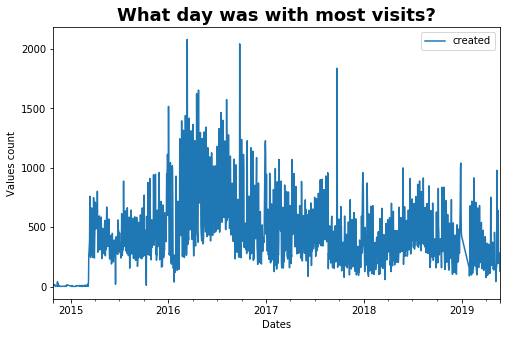

In [34]:
viisits_by_day = visit_opening_hours['created'].groupby(visits.created.dt.to_period("D")).agg('count')

plt.figure(figsize=(8,5))
plt.title('What day was with most visits?', fontdict={'fontweight': 'bold', 'fontsize':18})
viisits_by_day.plot()
plt.xlabel('Dates')
plt.ylabel('Values count')
plt.legend()
# plt.savefig('daily_registers.png', dpi=300)

In [13]:
viisits_by_day.nlargest(10)

created
2016-09-24    1969
2017-09-23    1827
2016-03-12    1732
2016-04-23    1522
2016-08-06    1497
2016-01-02    1388
2016-07-23    1365
2016-04-02    1346
2016-03-05    1340
2016-03-19    1300
Freq: D, Name: created, dtype: int64

In [ ]:
# stat visit vs no. of pens

In [55]:
total_pens= [{'2015': 1694, '2016': 2179, '2017': 1498, '2018': 1536, '2019': 915}]

pens_in_years = pd.DataFrame(total_pens)
pens_in_years = pens_in_years.transpose()
pens_in_years

,0
2015,1694
2016,2179
2017,1498
2018,1536
2019,915


In [56]:
pens_in_years.reset_index(inplace=True)
pens_in_years.rename({'index': 'year'}, axis=1, inplace=True)
pens_in_years

,year,0
0,2015,1694
1,2016,2179
2,2017,1498
3,2018,1536
4,2019,915


In [60]:
pens_in_years['year'] = pd.to_datetime(pens_in_years['year'])
pens_in_years['year']= pens_in_years['year'].dt.to_period('Y')

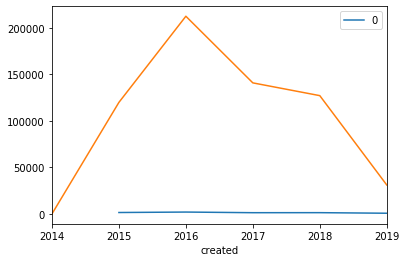

In [66]:
pens_in_years.plot(x='year')
visits_by_year.plot()

# user_id == 0 

In [11]:
visits[visits['user_id'] == 0].count()
#693161 visits with user_id ==0

id                693161
shortcode         693161
user_id           693161
created           693161
lastmodified      693161
registered        527671
paired                12
ticket            693161
deleted               12
first_accessed    126917
dtype: int64

In [18]:
visits['user_id'].count() - visit_opening_hours['user_id'].count()
#84,864 visits happened outside the opening hours. can that be the way to detect the staff?

84864

In [19]:
(visits['user_id'].count() - visit_opening_hours['user_id'].count()) / visits['user_id'].count() * 100

11.847847635428504

In [21]:
visit_opening_hours.reset_index(inplace=True)

In [22]:
visits_zero = visit_opening_hours[visit_opening_hours['user_id'] == 0]
visits_zero_by_month = visits_zero['created'].groupby(visits_zero.created.dt.to_period("M")).agg('count')
visits_zero_by_month.nlargest()

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


created
2016-07    19241
2016-08    17822
2016-04    17690
2016-05    16726
2016-03    15484
Freq: M, Name: created, dtype: int64

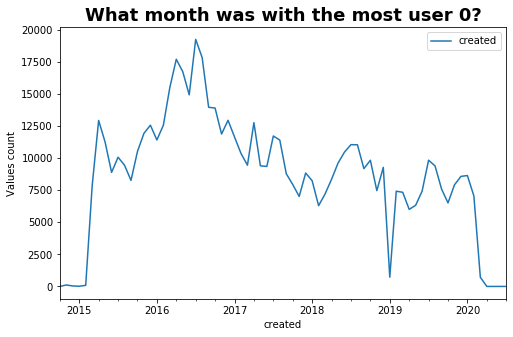

In [23]:
plt.figure(figsize=(8,5))
plt.title('What month was with the most user 0?', fontdict={'fontweight': 'bold', 'fontsize':18})

visits_zero_by_month.plot()
plt.ylabel('Values count')
plt.legend()
# plt.savefig('monthly_visits.png', dpi=300)

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


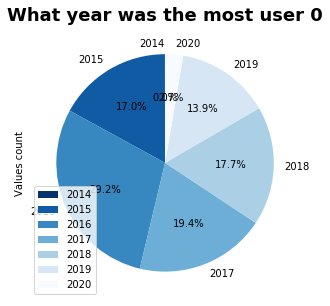

In [24]:
visits_zero_by_year = visits_zero['created'].groupby(visits_zero.created.dt.to_period("Y")).agg('count')

plt.figure(figsize=(8,5))
visits_zero_by_year.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('What year was the most user 0', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
# plt.savefig('yearly_activity.png', dpi=300)

#this aligned with the activity most year, and raiise a question about checkout years

# post engament_online accounts

In [14]:
visits_zero['id'].count() / visits['id'].count() *100
#3.3% opened account / 96.77 % are visits of user_id ==0

96.77208138693977

## Ticket Column

In [16]:
ticket_parse = visits['ticket']

In [17]:
def parse(string):
    if string is None:
        return {}
    else:
        try:
            return json.loads(string)
        except ValueError:
            print(string)
            return {}
        
    
json_str = ticket_parse.map(parse)

In [18]:
visits['ticket_id'] = json_str.map(lambda row: row.get('ticket_id'))

In [19]:
visits_clean = visits[['id', 'shortcode', 'ticket_id', 'user_id', 'created', 'lastmodified', 'registered', 'paired', 'deleted', 'first_accessed']]

In [20]:
visits_clean
##clean , might choose to clean first_accessed and paired

,id,shortcode,ticket_id,user_id,created,lastmodified,registered,paired,deleted,first_accessed
0,794965,20141029u305,794965,0,2014-10-29 21:10:47,2016-02-23 22:57:37,2014-10-29 21:10:47,2014-10-29 21:13:56,2014-10-29 23:19:52,NaN
1,795317,foo001,795317,0,2014-10-29 23:32:29,2016-02-23 22:57:37,2014-10-29 23:32:29,2014-10-29 23:33:06,2014-10-29 23:35:18,NaN
2,795341,foo002,795341,0,2014-10-29 23:40:51,2016-02-23 22:57:37,2014-10-29 23:40:51,2014-10-29 23:41:08,2014-10-29 23:41:21,NaN
3,795351,foo003,795351,0,2014-10-29 23:43:31,2016-02-23 22:57:37,2014-10-29 23:43:31,2014-10-29 23:44:28,2014-10-29 23:44:34,NaN
4,795405,foo004,795405,0,2014-10-30 00:13:47,2016-02-23 22:57:37,2014-10-30 00:13:47,2014-10-30 00:14:13,2014-10-30 00:14:41,NaN
...,...,...,...,...,...,...,...,...,...,...
716277,132806719,56bs6,940560,0,2020-07-09 13:11:50,2020-07-09 13:22:11,2020-07-09 13:12:12,NaT,NaT,1.594301e+09
716278,132806727,cvszd,940561,0,2020-07-09 13:16:19,2020-07-09 13:22:42,2020-07-09 13:16:32,NaT,NaT,1.594301e+09
716279,132806735,zrbqg,940562,0,2020-07-09 13:19:41,2020-07-09 13:22:54,2020-07-09 13:19:58,NaT,NaT,1.594301e+09
716280,132806749,Jr656,940563,0,2020-07-09 13:40:43,2020-07-09 13:40:43,2020-07-09 13:40:42,NaT,NaT,NaN


## summerizing fundings

In [25]:
findings = [{'Total visits': '716,282', 'visits outside opening hours':'11.8% of the total visits', 'most_visit_year': '2016', 'most_visit_month': '2016-07 with 23,562', 'most_visit_day': '2016-09-24 with 1,969'},
           {'most_visit_year': '2017', 'most_visit_month': '2016-04 with 21,719', 'most_visit_day': '2017-09-23 with 1,827'}, 
            {'most_visit_year': '2015', 'most_visit_month': '2016-08 with 20,642', 'most_visit_day': '2016-03-12 with 1,732'}]


visits_finding = pd.DataFrame(findings)

In [26]:
visits_finding

,Total visits,visits outside opening hours,most_visit_year,most_visit_month,most_visit_day
0,"716,282",11.8% of the total visits,2016,"2016-07 with 23,562","2016-09-24 with 1,969"
1,NaN,NaN,2017,"2016-04 with 21,719","2017-09-23 with 1,827"
2,NaN,NaN,2015,"2016-08 with 20,642","2016-03-12 with 1,732"


In [23]:
visits[visits['ticket_id'] == 793449]

,id,shortcode,user_id,created,lastmodified,registered,paired,ticket,deleted,first_accessed,timerange,ticket_id
